In [151]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon

In [152]:
df = pd.read_csv("fr-esr-parcoursup.csv",sep=";")
# https://data.enseignementsup-recherche.gouv.fr/explore/dataset/fr-esr-parcoursup/table/?timezone=Europe%2FBerlin&sort=tri

In [153]:
#On sépare les établissement à l'étranger
mask_et = df['Académie de l’établissement'] == 'Etranger'

#On separe les formations de france métropolitaine et Outre-Mer pour la carte geographique
mask_fr_MET = (df['Code départemental de l’établissement'].str.len() == 2) & (df['Académie de l’établissement'] != 'Etranger')
mask_fr_DROM = (df['Code départemental de l’établissement'].str.len() == 3) & (df['Académie de l’établissement'] != 'Etranger')

In [154]:
df_ET = df.loc[mask_et]
df_MET = df.loc[mask_fr_MET]
df_DROM = df.loc[mask_fr_DROM]

#cod_aff_form==38922 est positionné à Paris mais coordonnees GPS à Guadeloupe, Antilles
cond = df_MET["cod_aff_form"]==38922
rows = df_MET.loc[cond, :]
df_DROM = df_DROM.append(rows, ignore_index=True)
df_MET.drop(rows.index, inplace=True)

C:\Users\remic\AppData\Local\Temp\ipykernel_12424\2162473927.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_DROM = df_DROM.append(rows, ignore_index=True)
C:\Users\remic\AppData\Local\Temp\ipykernel_12424\2162473927.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MET.drop(rows.index, inplace=True)


### Download France Shapefile 
https://wxs.ign.fr/oikr5jryiph0iwhw36053ptm/telechargement/inspire/GEOFLA_THEME-ARRONDISSEMENT_2016-01-01$GEOFLA_2-2_ARRONDISSEMENT_SHP_LAMB93_FXX_2016-06-28/file/GEOFLA_2-2_ARRONDISSEMENT_SHP_LAMB93_FXX_2016-06-28.7z

In [155]:
street_map = gpd.read_file(r"D:\IMT Atlantique\TAF\DaSci\A journey to data scientist\projet rattrapage\GEOFLA_2-2_ARRONDISSEMENT_SHP_LAMB93_FXX_2016-06-28\GEOFLA\1_DONNEES_LIVRAISON_2021-02-00037\GEOFLA_2-2_SHP_LAMB93_FR-ED161\ARRONDISSEMENT\ARRONDISSEMENT.shp")

In [156]:
df_MET[['Latitude', 'Longitude']] = df_MET["Coordonnées GPS de la formation"].str.split(', ', 1, expand=True)

C:\Users\remic\AppData\Local\Temp\ipykernel_12424\2447760764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MET[['Latitude', 'Longitude']] = df_MET["Coordonnées GPS de la formation"].str.split(', ', 1, expand=True)
C:\Users\remic\AppData\Local\Temp\ipykernel_12424\2447760764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MET[['Latitude', 'Longitude']] = df_MET["Coordonnées GPS de la formation"].str.split(', ', 1, expand=True)


In [157]:
df_MET.sort_values('Latitude')

Session  \
7787      2022   
1368      2022   
10360     2022   
7568      2022   
13535     2022   
...        ...   
710       2022   
10674     2022   
3423      2022   
696       2022   
697       2022   

      Statut de l’établissement de la filière de formation (public, privé…)  \
7787                                              Public                      
1368                                              Public                      
10360                                             Public                      
7568                                              Public                      
13535                                 Privé hors contrat                      
...                                                  ...                      
710                                               Public                      
10674                                             Public                      
3423                                              Public                      
696                                               Public                      
697                                               Public                      

      Code UAI de l'établissement                          Établissement  \
7787                     6200043C               Lycée Georges Clemenceau   
1368                     6200190M                 Lycée agricole Sartene   
10360                    6200190M                 Lycée agricole Sartene   
7568                     6200190M                 Lycée agricole Sartene   
13535                    6200737G              ANTENNE I.F.R.T.S AJACCIO   
...                           ...                                    ...   
710                      0590255G        Lycée professionnel GUY DEBEYRE   
10674                    0595770B  Lycée agricole de Dunkerque-Rosendaël   
3423                     0590073J                Lycée Auguste Angellier   
696                      0590073J                Lycée Auguste Angellier   
697                      0590073J                Lycée Auguste Angellier   

      Code départemental de l’établissement Département de l’établissement  \
7787                                     2A                   Corse du Sud   
1368                                     2A                   Corse du Sud   
10360                                    2A                   Corse du Sud   
7568                                     2A                   Corse du Sud   
13535                                    2A                   Corse du Sud   
...                                     ...                            ...   
710                                      59                           Nord   
10674                                    59                           Nord   
3423                                     59                           Nord   
696                                      59                           Nord   
697                                      59                           Nord   

      Région de l’établissement Académie de l’établissement  \
7787                      Corse                       Corse   
1368                      Corse                       Corse   
10360                     Corse                       Corse   
7568                      Corse                       Corse   
13535                     Corse                       Corse   
...                         ...                         ...   
710             Hauts-de-France                       Lille   
10674           Hauts-de-France                       Lille   
3423            Hauts-de-France                       Lille   
696             Hauts-de-France                       Lille   
697             Hauts-de-France                       Lille   

      Commune de l’établissement                        Filière de formation  \
7787                     Sartène  Classe préparatoire aux études supérieures   
1368                     Sartène                              BTS - Agrico

In [189]:
df_MET.columns.tolist()

['Session',
 'Statut de l’établissement de la filière de formation (public, privé…)',
 "Code UAI de l'établissement",
 'Établissement',
 'Code départemental de l’établissement',
 'Département de l’établissement',
 'Région de l’établissement',
 'Académie de l’établissement',
 'Commune de l’établissement',
 'Filière de formation',
 'Sélectivité',
 'Filière de formation très agrégée',
 'Filière de formation détaillée',
 'Filière de formation.1',
 'Filière de formation détaillée bis',
 'Filière de formation très détaillée',
 'Coordonnées GPS de la formation',
 'Capacité de l’établissement par formation',
 'Effectif total des candidats pour une formation',
 'Dont effectif des candidates pour une formation',
 'Effectif total des candidats en phase principale',
 'Dont effectif des candidats ayant postulé en internat',
 'Effectif des candidats néo bacheliers généraux en phase principale',
 'Dont effectif des candidats boursiers néo bacheliers généraux en phase principale',
 'Effectif des candi

In [159]:
crs = {'init':'epsg:4326'}

In [160]:
geometry = [Point(xy) for xy in zip(df_MET['Longitude'], df_MET['Latitude'])]

In [181]:
df_MET[["Établissement","geometry"]]

Établissement  \
0               La Prépa des INP - Groupe INP - Grenoble   
1                  La Prépa des INP - Groupe INP - Nancy   
2                          AgroSup Dijon - Institut Agro   
3                                      Polytech Grenoble   
4                                            ISAT Nevers   
...                                                  ...   
13638                     Association Forme de Compiègne   
13639                                   Campus d'Orléans   
13640                                   Campus d'Orléans   
13641                          Université Paris Nanterre   
13643  Institut de formation en psychomotricité de Ne...   

                       geometry  
0      POINT (5.76520 45.19510)  
1      POINT (6.15225 48.65510)  
2      POINT (5.06626 47.31090)  
3      POINT (5.75389 45.18500)  
4      POINT (3.17175 46.99762)  
...                         ...  
13638  POINT (2.78266 49.38869)  
13639  POINT (1.93349 47.84477)  
13640  POINT (1.93379 47.84457)  
13641  POINT (2.21449 48.90350)  
13643  POINT (3.14441 46.99100)  

[12987 rows x 2 columns]

In [190]:
geo_df = gpd.GeoDataFrame(df_MET[["Établissement",'Effectif total des candidats pour une formation',"Filière de formation détaillée","geometry"]],crs=crs,geometry=geometry)

c:\Users\remic\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot:>

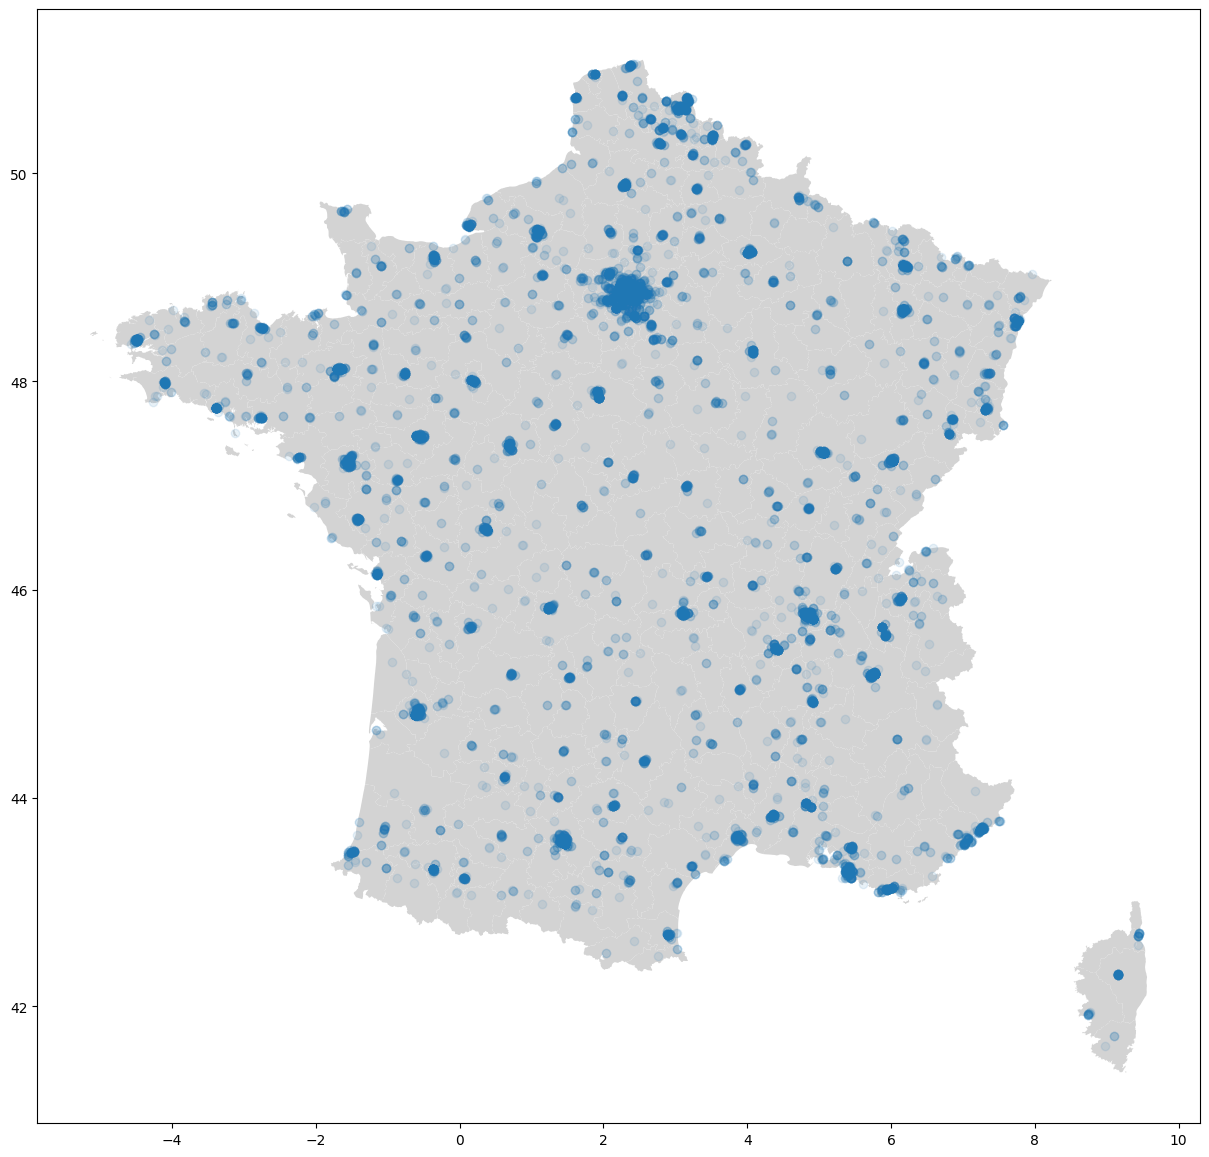

In [185]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df.plot(ax=ax,alpha = .1)

<AxesSubplot:>

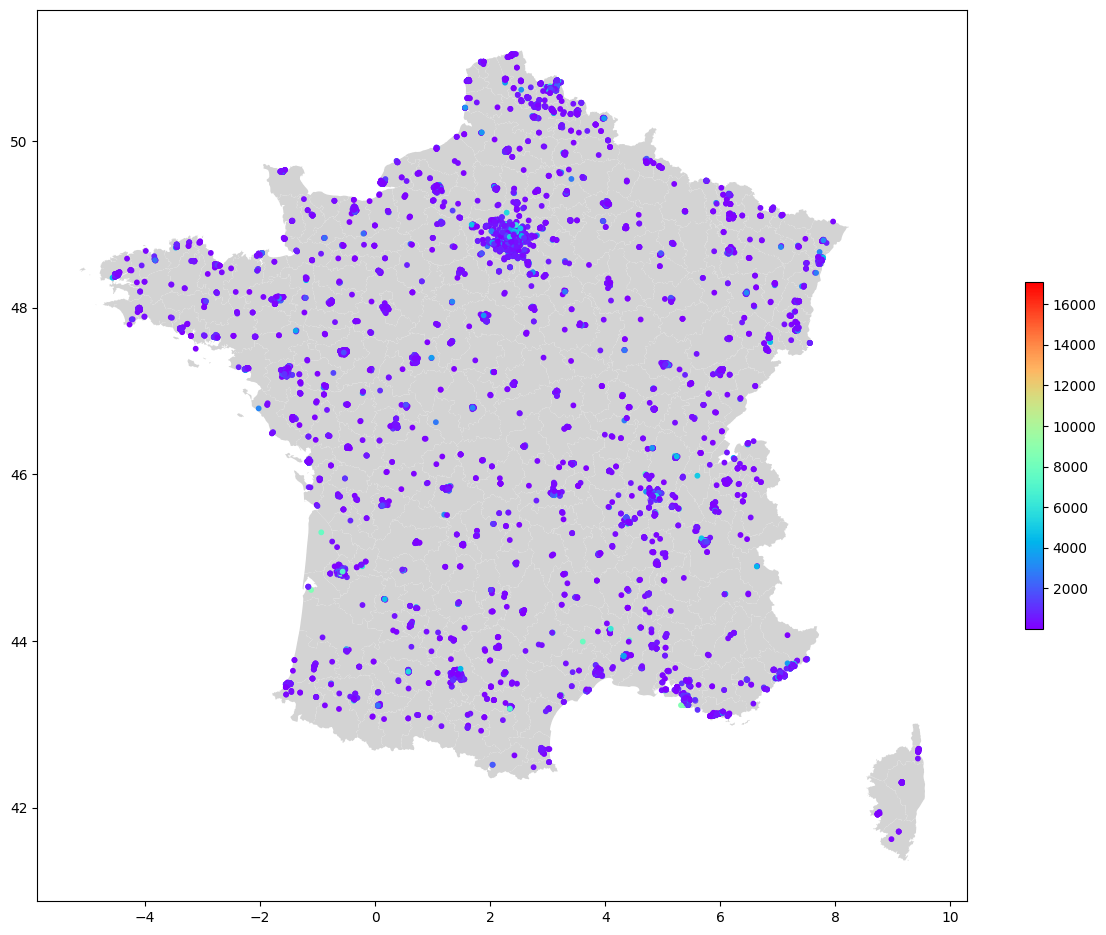

In [167]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df.plot(column = 'Effectif total des candidats pour une formation', ax=ax, cmap = 'rainbow',
            legend = True, legend_kwds={'shrink': 0.3}, 
            markersize = 10)

In [191]:
geo_df.explore(column = 'Effectif total des candidats pour une formation', cmap = 'rainbow',
            legend = True, legend_kwds={'shrink': 0.3})

In [20]:
df.drop(['Lien de la formation sur la plateforme Parcoursup','Coordonnées GPS de la formation','Département de l’établissement','cod_aff_form'], axis=1, inplace=True)

In [8]:
df.describe(include='all')

Session  \
count   13644.0   
unique      NaN   
top         NaN   
freq        NaN   
mean     2022.0   
std         0.0   
min      2022.0   
25%      2022.0   
50%      2022.0   
75%      2022.0   
max      2022.0   

       Statut de l’établissement de la filière de formation (public, privé…)  \
count                                               13644                      
unique                                                  4                      
top                                                Public                      
freq                                                10737                      
mean                                                  NaN                      
std                                                   NaN                      
min                                                   NaN                      
25%                                                   NaN                      
50%                                                   NaN                      
75%                                                   NaN                      
max                                                   NaN                      

       Code UAI de l'établissement        Établissement  \
count                        13644                13644   
unique                        3926                 3570   
top                       0597065J  Université de Lille   
freq                           117                  117   
mean                           NaN                  NaN   
std                            NaN                  NaN   
min                            NaN                  NaN   
25%                            NaN                  NaN   
50%                            NaN                  NaN   
75%                            NaN                  NaN   
max                            NaN                  NaN   

       Code départemental de l’établissement Région de l’établissement  \
count                                  13644                     13644   
unique                                   104                        21   
top                                       75             Ile-de-France   
freq                                     985                      2548   
mean                                     NaN                       NaN   
std                                      NaN                       NaN   
min                                      NaN                       NaN   
25%                                      NaN                       NaN   
50%                                      NaN                       NaN   
75%                                      NaN                       NaN   
max                                      NaN                       NaN   

       Académie de l’établissement Commune de l’établissement  \
count                        13644                      13644   
unique                          32                       1248   
top                          Paris                   Toulouse   
freq                           985                        327   
mean                           NaN                        NaN   
std                            NaN                        NaN   
min                            NaN                        NaN   
25%                            NaN                        NaN   
50%                            NaN                        NaN   
75%                            NaN                        NaN   
max                            NaN                        NaN   

       Filière de formation          Sélectivité  ...  \
count                 13644                13644  ...   
unique                   54                    2  ...   
top          BTS - Services  formation sélective  ...   
freq                   3076                10616  ...   
mean                    NaN                  NaN  ...   
std                     NaN                  NaN  ...   
min                     NaN             

In [9]:
df_lannion = df[df["Établissement"].str.contains("Lannion")]

In [12]:
df_lannion['Filière de formation détaillée']

215      I.U.T de Lannion - BUT - Informatique (Seconde...
2951     I.U.T de Lannion - BUT - Réseaux et télécommun...
5030     I.U.T de Lannion - BUT - Métiers du multimédia...
6413     I.U.T de Lannion - BUT - Information communica...
8115     Regroupement d'IFSI Université Rennes - D.E In...
9181     I.U.T de Lannion - BUT - Information communica...
11185    I.U.T de Lannion - BUT - Mesures physiques (Se...
Name: Filière de formation détaillée, dtype: object